In [33]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D
from keras.optimizers import Adam
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [34]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [35]:
# Path to the main flower dataset folder
dataset_folder = 'Fruits\Citrus'


In [36]:
# List of class names
class_names = ['Black spot','Canker','Greening','Healthy','Melanose']

In [37]:
# Load and preprocess images
data = []
labels = []

for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((32, 32))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)

In [38]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [39]:

# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (388, 32, 32, 3)
y_train shape: (388,)
x_val shape (97, 32, 32, 3)
y_val shape : (97,)
x_test shape: (122, 32, 32, 3)
y_test shape: (122,)


In [40]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0
     

In [41]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 5)
y_val = keras.utils.to_categorical(y_val, 5)
y_test = keras.utils.to_categorical(y_test, 5)
     

In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)

In [43]:

from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.layers  import Input
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam

In [44]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(32,32,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(5,activation='softmax'),
    ]
)
customModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
customModel.summary()
     

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization_10 (Ba  (None, 32, 32, 512)       2048      
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 512)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_11 (Ba  (None, 16, 16, 256)      

In [45]:
y_train.shape

(388, 5)

In [46]:
history = customModel.fit(
    x_train,y_train,
    epochs=35,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])


Epoch 1/35
13/13 [==============================] - ETA: 0s - loss: 1.3662 - accuracy: 0.3686

c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 17s 1s/step - loss: 1.3662 - accuracy: 0.3686 - val_loss: 1.4752 - val_accuracy: 0.2784
Epoch 2/35
13/13 [==============================] - ETA: 0s - loss: 1.1101 - accuracy: 0.5206WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 15s 1s/step - loss: 1.1101 - accuracy: 0.5206 - val_loss: 1.4026 - val_accuracy: 0.3402
Epoch 3/35
13/13 [==============================] - ETA: 0s - loss: 0.8545 - accuracy: 0.6598WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 15s 1s/step - loss: 0.8545 - accuracy: 0.6598 - val_loss: 1.4154 - val_accuracy: 0.3402
Epoch 4/35
13/13 [==============================] - ETA: 0s - loss: 0.7479 - accuracy: 0.7062WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.7479 - accuracy: 0.7062 - val_loss: 1.4788 - val_accuracy: 0.3093
Epoch 5/35
13/13 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.6933WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.6791 - accuracy: 0.6933 - val_loss: 1.4663 - val_accuracy: 0.3402
Epoch 6/35
13/13 [==============================] - ETA: 0s - loss: 0.6570 - accuracy: 0.7088WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.6570 - accuracy: 0.7088 - val_loss: 1.4285 - val_accuracy: 0.2887
Epoch 7/35
13/13 [==============================] - ETA: 0s - loss: 0.5183 - accuracy: 0.8015WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.5183 - accuracy: 0.8015 - val_loss: 1.5245 - val_accuracy: 0.2990
Epoch 8/35
13/13 [==============================] - ETA: 0s - loss: 0.5308 - accuracy: 0.7990WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.5308 - accuracy: 0.7990 - val_loss: 1.6511 - val_accuracy: 0.3402
Epoch 9/35
13/13 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.7809WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.5729 - accuracy: 0.7809 - val_loss: 1.9247 - val_accuracy: 0.3299
Epoch 10/35
13/13 [==============================] - ETA: 0s - loss: 0.4778 - accuracy: 0.8067WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.4778 - accuracy: 0.8067 - val_loss: 2.5829 - val_accuracy: 0.3402
Epoch 11/35
13/13 [==============================] - ETA: 0s - loss: 0.7446 - accuracy: 0.7062WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.7446 - accuracy: 0.7062 - val_loss: 2.1016 - val_accuracy: 0.4021
Epoch 12/35
13/13 [==============================] - ETA: 0s - loss: 0.5474 - accuracy: 0.7500WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.5474 - accuracy: 0.7500 - val_loss: 2.0902 - val_accuracy: 0.2887
Epoch 13/35
13/13 [==============================] - ETA: 0s - loss: 0.4410 - accuracy: 0.8196WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.4410 - accuracy: 0.8196 - val_loss: 1.7806 - val_accuracy: 0.3196
Epoch 14/35
13/13 [==============================] - ETA: 0s - loss: 0.4543 - accuracy: 0.8196WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.4543 - accuracy: 0.8196 - val_loss: 2.3690 - val_accuracy: 0.2577
Epoch 15/35
13/13 [==============================] - ETA: 0s - loss: 0.3817 - accuracy: 0.8351WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.3817 - accuracy: 0.8351 - val_loss: 2.6857 - val_accuracy: 0.3402
Epoch 16/35
13/13 [==============================] - ETA: 0s - loss: 0.4690 - accuracy: 0.8376WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.4690 - accuracy: 0.8376 - val_loss: 2.8633 - val_accuracy: 0.3402
Epoch 17/35
13/13 [==============================] - ETA: 0s - loss: 0.5517 - accuracy: 0.7835WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 13s 1s/step - loss: 0.5517 - accuracy: 0.7835 - val_loss: 7.5327 - val_accuracy: 0.3402
Epoch 18/35
13/13 [==============================] - ETA: 0s - loss: 0.4753 - accuracy: 0.8196WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 13s 1s/step - loss: 0.4753 - accuracy: 0.8196 - val_loss: 6.1114 - val_accuracy: 0.3402
Epoch 19/35
13/13 [==============================] - ETA: 0s - loss: 0.4623 - accuracy: 0.8067WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 15s 1s/step - loss: 0.4623 - accuracy: 0.8067 - val_loss: 4.9027 - val_accuracy: 0.3402
Epoch 20/35
13/13 [==============================] - ETA: 0s - loss: 0.4385 - accuracy: 0.8273WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.4385 - accuracy: 0.8273 - val_loss: 2.7382 - val_accuracy: 0.2474
Epoch 21/35
13/13 [==============================] - ETA: 0s - loss: 0.4137 - accuracy: 0.8299WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.4137 - accuracy: 0.8299 - val_loss: 2.3767 - val_accuracy: 0.2680
Epoch 22/35
13/13 [==============================] - ETA: 0s - loss: 0.2874 - accuracy: 0.8814WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.2874 - accuracy: 0.8814 - val_loss: 1.9990 - val_accuracy: 0.3299
Epoch 23/35
13/13 [==============================] - ETA: 0s - loss: 0.5031 - accuracy: 0.8067WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 13s 1s/step - loss: 0.5031 - accuracy: 0.8067 - val_loss: 1.8331 - val_accuracy: 0.2680
Epoch 24/35
13/13 [==============================] - ETA: 0s - loss: 0.3918 - accuracy: 0.8325WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.3918 - accuracy: 0.8325 - val_loss: 1.9701 - val_accuracy: 0.3299
Epoch 25/35
13/13 [==============================] - ETA: 0s - loss: 0.4080 - accuracy: 0.8608WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.4080 - accuracy: 0.8608 - val_loss: 1.5724 - val_accuracy: 0.3505
Epoch 26/35
13/13 [==============================] - ETA: 0s - loss: 0.2819 - accuracy: 0.8943WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 16s 1s/step - loss: 0.2819 - accuracy: 0.8943 - val_loss: 1.3164 - val_accuracy: 0.4124
Epoch 27/35
13/13 [==============================] - ETA: 0s - loss: 0.3648 - accuracy: 0.8454WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.3648 - accuracy: 0.8454 - val_loss: 2.7691 - val_accuracy: 0.2268
Epoch 28/35
13/13 [==============================] - ETA: 0s - loss: 0.3217 - accuracy: 0.8763WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 13s 1s/step - loss: 0.3217 - accuracy: 0.8763 - val_loss: 2.2211 - val_accuracy: 0.3918
Epoch 29/35
13/13 [==============================] - ETA: 0s - loss: 0.3367 - accuracy: 0.8634WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 13s 1s/step - loss: 0.3367 - accuracy: 0.8634 - val_loss: 2.6546 - val_accuracy: 0.3608
Epoch 30/35
13/13 [==============================] - ETA: 0s - loss: 0.2587 - accuracy: 0.9046WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 13s 1s/step - loss: 0.2587 - accuracy: 0.9046 - val_loss: 1.6823 - val_accuracy: 0.4330
Epoch 31/35
13/13 [==============================] - ETA: 0s - loss: 0.1915 - accuracy: 0.9253WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.1915 - accuracy: 0.9253 - val_loss: 1.7260 - val_accuracy: 0.4330
Epoch 32/35
13/13 [==============================] - ETA: 0s - loss: 0.3283 - accuracy: 0.8918WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 14s 1s/step - loss: 0.3283 - accuracy: 0.8918 - val_loss: 3.5987 - val_accuracy: 0.1856
Epoch 33/35
13/13 [==============================] - ETA: 0s - loss: 0.3396 - accuracy: 0.8737WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 13s 1s/step - loss: 0.3396 - accuracy: 0.8737 - val_loss: 1.2630 - val_accuracy: 0.5258
Epoch 34/35
13/13 [==============================] - ETA: 0s - loss: 0.2667 - accuracy: 0.8995WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 13s 1s/step - loss: 0.2667 - accuracy: 0.8995 - val_loss: 2.7705 - val_accuracy: 0.3711
Epoch 35/35
13/13 [==============================] - ETA: 0s - loss: 0.2502 - accuracy: 0.8995WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


13/13 [==============================] - 13s 1s/step - loss: 0.2502 - accuracy: 0.8995 - val_loss: 1.5823 - val_accuracy: 0.5670


In [47]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)

4/4 [==============================] - 1s 163ms/step - loss: 1.5823 - accuracy: 0.5670
Validation accuracy :  0.5670102834701538


In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


In [49]:
import matplotlib.pyplot as plt

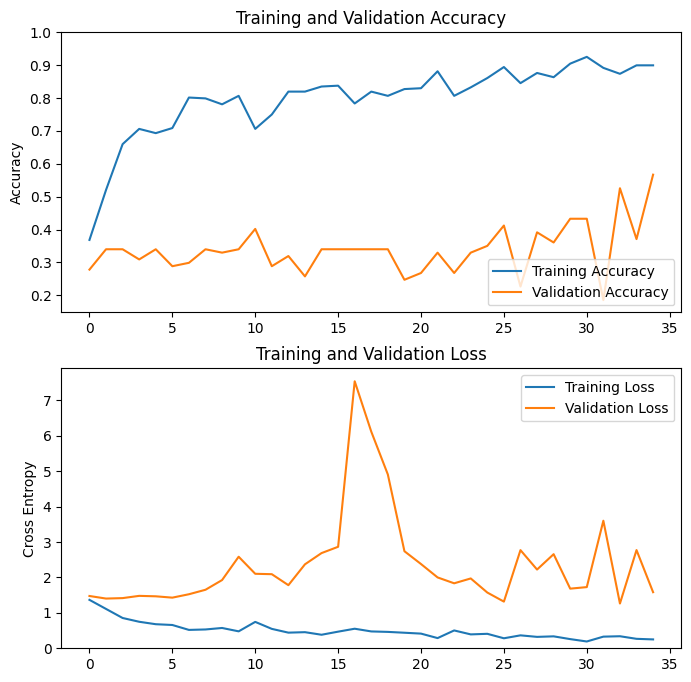

In [50]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [51]:
import pandas as pd
import seaborn as sns
     

4/4 [==============================] - 1s 192ms/step


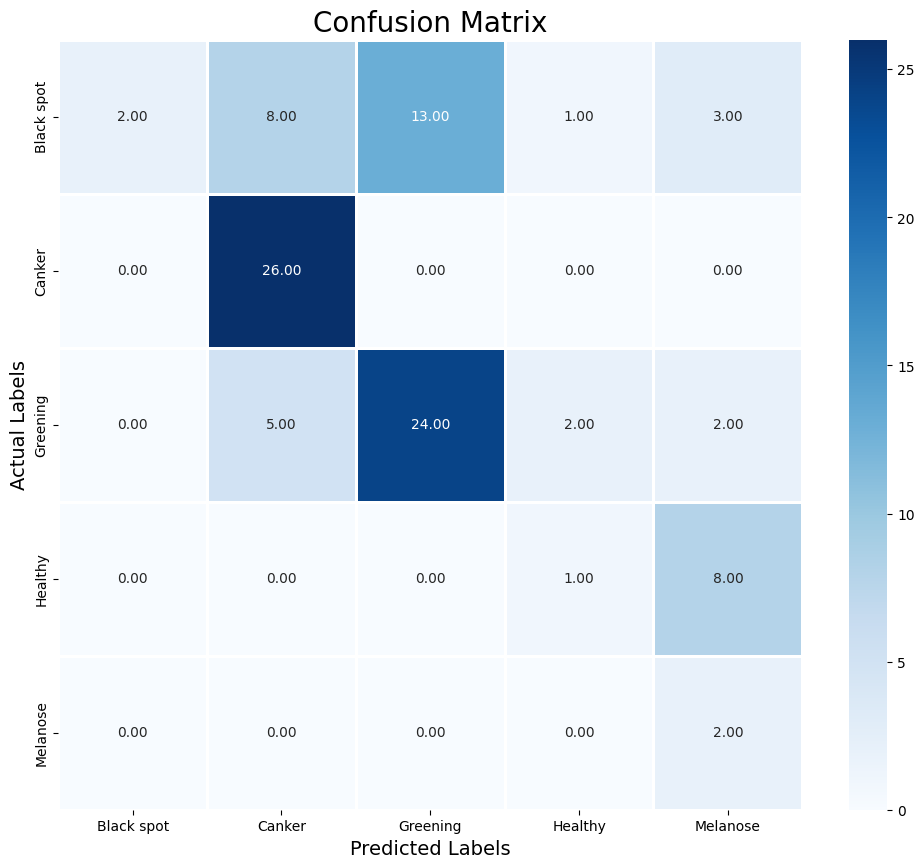

              precision    recall  f1-score   support

           0       1.00      0.07      0.14        27
           1       0.67      1.00      0.80        26
           2       0.65      0.73      0.69        33
           3       0.25      0.11      0.15         9
           4       0.13      1.00      0.24         2

    accuracy                           0.57        97
   macro avg       0.54      0.58      0.40        97
weighted avg       0.70      0.57      0.51        97



In [52]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))

In [54]:
score = customModel.evaluate(x_test, y_test)

4/4 [==============================] - 1s 227ms/step - loss: 1.6532 - accuracy: 0.5246


In [55]:

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.6531609296798706
Test accuracy: 0.5245901346206665


In [56]:
customModel.save('Citrus_Saved_Model')

INFO:tensorflow:Assets written to: Citrus_Saved_Model\assets


INFO:tensorflow:Assets written to: Citrus_Saved_Model\assets


In [57]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('Citrus_Saved_Model')

In [58]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [59]:
# List of class names
class_names = ['Black spot','Canker','Greening','Healthy','Melanose']

In [ ]:
# Predict the class
image_path = 'flowers/rose/12240303_80d87f77a3_n.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)